Max nodes reached!


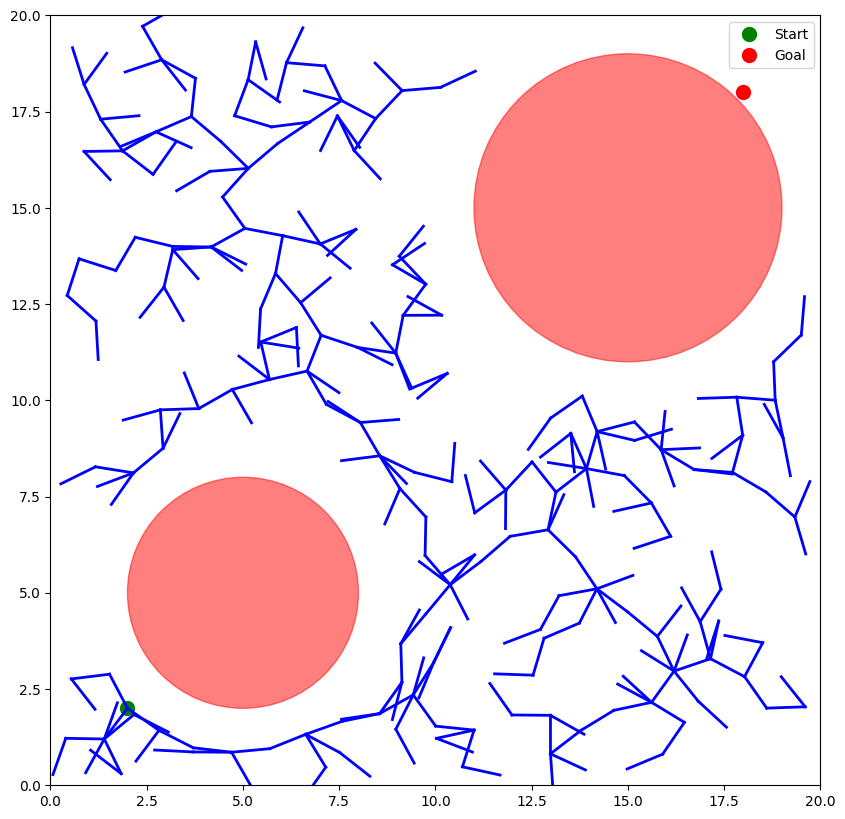

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Robot parameters
robot_radius = 1  # Radius of the robot
step_size = 1  # Step size for each node
max_nodes = 500  # Maximum number of nodes in the tree

# Workspace boundaries
workspace_x = [0, 20]
workspace_y = [0, 20]

# Obstacles (format: [x_center, y_center, radius])
obstacles = np.array([[5, 5, 3], [15, 15, 4]])

# Start and goal positions
start = np.array([2, 2])
goal = np.array([18, 18])

# RRT tree initialization
tree_nodes = [start]
tree_parents = [None]

# Function to check if a point is in collision with any obstacles
def is_collision(point, obstacles):
    for obs in obstacles:
        distance = np.linalg.norm(point - obs[:2])
        if distance < obs[2] + robot_radius:
            return True
    return False

# Function to find the nearest node in the tree to a random point
def find_nearest_node(rand_point, tree_nodes):
    distances = np.linalg.norm(np.array(tree_nodes) - rand_point, axis=1)
    nearest_idx = np.argmin(distances)
    return nearest_idx, tree_nodes[nearest_idx]

# RRT Algorithm
def rrt(start, goal, obstacles):
    for i in range(max_nodes):
        # Generate random point
        rand_point = np.array([random.uniform(workspace_x[0], workspace_x[1]),
                               random.uniform(workspace_y[0], workspace_y[1])])

        # Find the nearest node in the tree
        nearest_idx, nearest_node = find_nearest_node(rand_point, tree_nodes)

        # Calculate direction towards the random point
        direction = (rand_point - nearest_node) / np.linalg.norm(rand_point - nearest_node)
        new_node = nearest_node + direction * step_size

        # Check if new node is in collision
        if not is_collision(new_node, obstacles):
            tree_nodes.append(new_node)
            tree_parents.append(nearest_idx)

            # Plot the edge connecting the nodes
            plt.plot([nearest_node[0], new_node[0]], [nearest_node[1], new_node[1]], 'b-', lw=2)

            # Check if the new node is close enough to the goal
            if np.linalg.norm(new_node - goal) < step_size:
                print("Goal reached!")
                return new_node

    print("Max nodes reached!")
    return None

# Path reconstruction from the tree
def reconstruct_path(goal_node):
    path = [goal_node]
    current_node_idx = len(tree_nodes) - 1
    while tree_parents[current_node_idx] is not None:
        parent_node_idx = tree_parents[current_node_idx]
        path.append(tree_nodes[parent_node_idx])
        current_node_idx = parent_node_idx
    return np.array(path)

# Plotting the environment and obstacles
def plot_environment():
    plt.figure(figsize=(10, 10))
    plt.xlim(workspace_x)
    plt.ylim(workspace_y)
    plt.gca().set_aspect('equal', adjustable='box')

    # Plot obstacles
    for obs in obstacles:
        circle = plt.Circle((obs[0], obs[1]), obs[2], color='r', alpha=0.5)
        plt.gca().add_artist(circle)

    # Plot start and goal
    plt.plot(start[0], start[1], 'go', markersize=10, label="Start")
    plt.plot(goal[0], goal[1], 'ro', markersize=10, label="Goal")

# Main simulation
def main():
    plot_environment()

    # Run RRT algorithm to find the path
    goal_node = rrt(start, goal, obstacles)

    # If a path to the goal was found, reconstruct and plot the path
    if goal_node is not None:
        path = reconstruct_path(goal_node)
        plt.plot(path[:, 0], path[:, 1], 'k-', lw=3, label="Path")

    # Show the plot
    plt.legend()
    plt.show()

# Run the simulation
if __name__ == "__main__":
    main()
